<a href="https://colab.research.google.com/github/linainsaf/image_audio_processing/blob/main/image_processing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from numpy import asarray
from PIL import Image, ImageDraw

1. Lisibilité. Que doit-on faire pour augmenter la lisibilité de l’image aquitain.tif ?

On ne puise discerner que très peu de détails dans l'image. La raison la plus probable est que les pixels qui représentent différents objets ou différentes parties d’un objet ont un niveau de gris très proche.

On applique donc La normalisation d'histogramme, ou expansion de dynamique, une transformation qui affine du niveau de gris des pixels de telle
sorte que l'image utilise toute la dynamique de représentation.


l’histogramme de l’image « mauvaise » est très resserré
alors que celui de l’image « bonne » est plus étalé.

2- Lissage. Le tableau ci-dessous rend l'image plus floue. On dit que c'est un
filtre passe-bas. Appliquer ce tableau revient en fait à remplacer la valeur
de chaque pixel par la moyenne des 9 pixels formant un carré autour du
pixel visé.

In [ ]:
def lissage(image):
    # On charge l'image et on la transforme en tableau contenant les couleurs
    image = np.asarray(Image.open(image))
    nb_lignes,nb_colonnes,_ = image.shape

    # Le noyau :
    noyau = np.array([[1 / 9, 1 / 9, 1 / 9],
                    [1 / 9, 1 / 9, 1 / 9],
                    [1 / 9, 1 / 9, 1 / 9]])
    # Modification de l'image :
    image_sortie = np.copy(image)
    for ligne in range(1,nb_lignes-1):
      for col in range(1,nb_colonnes-1):
          # On calcule la somme 
          somme = 0
          for l in range(3):
              for c in range(3):
                  somme += noyau[l,c]*image[ligne-1+l,col-1+c] 
          image_sortie[ligne,col] = somme

    # On sauvegarde les images pour pouvoir les afficher
    Image.fromarray(image_sortie).save("image_sortie_lissage.png")

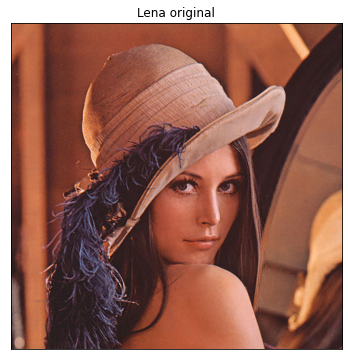

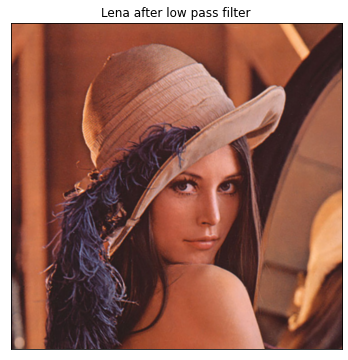

In [ ]:
lissage('Lena.jpg')
img = mpimg.imread('Lena.jpg')
plt.figure(figsize=(6,6))
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Lena original')
plt.xticks(())
plt.yticks(())
plt.show()
img1 = mpimg.imread('image_sortie_lissage.png')
plt.figure(figsize=(6,6))
plt.imshow(img1, cmap=plt.cm.gray)
plt.title('Lena after low pass filter')
plt.xticks(())
plt.yticks(())
plt.show()

3. Accentuation. À l'inverse, le tableau ci-après rendra l'image plus nette.
C'est un filtre passe-haut. Attention ! Il peut arriver que la nouvelle valeur
ne soit plus comprise entre 0 et 255. Il faudra donc toujours prendre min(x,
255) et max(x, 0), où x est la nouvelle valeur.

In [ ]:
def acc(image):
  # On charge l'image et on la transforme en tableau contenant les couleurs
  image = np.asarray(Image.open(image),dtype = float)
  nb_lignes,nb_colonnes= image.shape

  # Le noyau :
  noyau = np.array([[0, -0.5, 0],
                    [-0.5, 3, -0.5],
                    [0, -0.5, 0 ]])

  # Modification de l'image :
  image_sortie = np.copy(image)
  for ligne in range(1,nb_lignes-1):
      for col in range(1,nb_colonnes-1):
          # On calcule la somme 
          somme = 0
          for l in range(3):
              for c in range(3):
                  somme += noyau[l,c]*image[ligne-1+l,col-1+c]
          image_sortie[ligne,col] = somme


  # On sauvegarde les images pour pouvoir les afficher
  Image.fromarray(image_sortie.clip(0,255).astype("uint8")).save("image_sortie_acc.png")

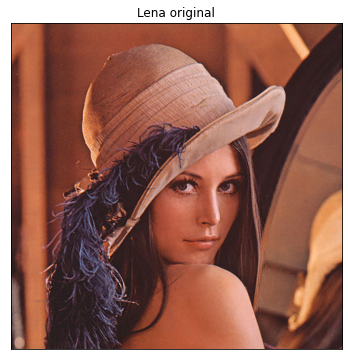

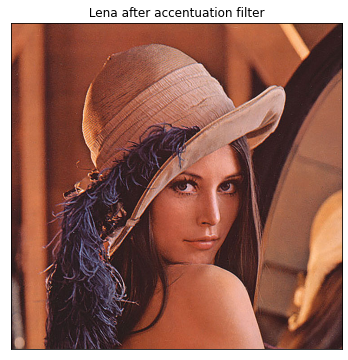

In [ ]:
acc('Lena.jpg')
img = mpimg.imread('Lena.jpg')
plt.figure(figsize=(6,6))
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Lena original')
plt.xticks(())
plt.yticks(())
plt.show()
img1 = mpimg.imread('image_sortie_acc.png')
plt.figure(figsize=(6,6))
plt.imshow(img1, cmap=plt.cm.gray)
plt.title(' Lena after accentuation filter ')
plt.xticks(())
plt.yticks(())
plt.show()

4- Gradient (filtre de Sobel). Pour faire simple, l'opérateur calcule le gradient
de l'intensité de chaque pixel. Ceci indique la direction de la plus forte
variation du clair au sombre, ainsi que le taux de changement dans cette
direction. On connaît alors les points de changement soudain de
luminosité, correspondant probablement à des bords.

In [ ]:
def grad(image):
  # On charge l'image et on la transforme en tableau contenant les couleurs
  image = np.asarray(Image.open(image),dtype = float)
  nb_lignes,nb_colonnes,_ = image.shape

  # Le noyau :
  noyau_v = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])

  noyau_h = np.array([[-1, -2, -1],
                      [0, 0, 0],
                      [1, 2, 1]])
                      
  # Modification de l'image :
  image_sortie = np.copy(image)
  for ligne in range(1,nb_lignes-1):
      for col in range(1,nb_colonnes-1):
          # On calcule la somme 
          somme_v,somme_h = 0,0
          for l in range(3):
              for c in range(3):
                  somme_v += noyau_v[l,c]*image[ligne-1+l,col-1+c]
                  somme_h += noyau_h[l,c]*image[ligne-1+l,col-1+c]
          image_sortie[ligne,col] = (somme_v*somme_v+somme_h*somme_h)**0.5


  # On sauvegarde les images pour pouvoir les afficher
  Image.fromarray(image_sortie.clip(0,255).astype("uint8")).save("image_sortie_grad.png")

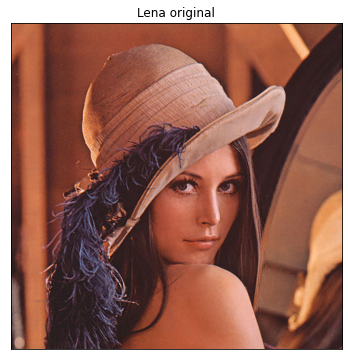

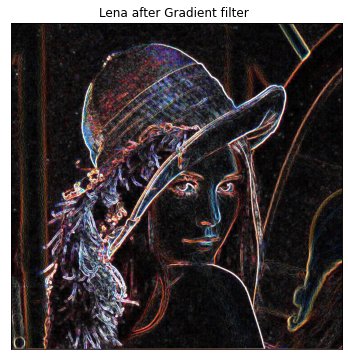

In [ ]:
grad('Lena.jpg')
img = mpimg.imread('Lena.jpg')
plt.figure(figsize=(6,6))
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Lena original')
plt.xticks(())
plt.yticks(())
plt.show()
img1 = mpimg.imread('image_sortie_grad.png')
plt.figure(figsize=(6,6))
plt.imshow(img1, cmap=plt.cm.gray)
plt.title('Lena after Gradient filter ')
plt.xticks(())
plt.yticks(())
plt.show()

5- Le filtre médian. La technique de filtre médian est largement utilisée en
traitement d'images numériques, car elle permet de réduire le bruit tout
en conservant les contours de l'image. L'idée principale du filtre médian
est de remplacer chaque pixel par la valeur médiane de son voisinage.
Ce type de filtre médian est appelé « marginal ». Considérons neuf pixels
en niveaux de gris, dont une valeur est aberrante (ici 255):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


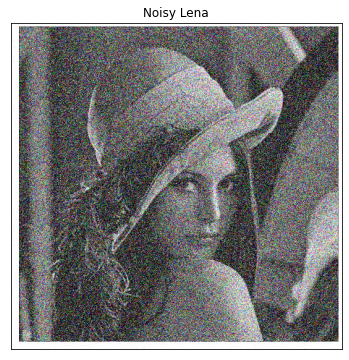

In [ ]:
img = mpimg.imread('lena_gray.png')
img_noisy1 = img + 0.2*np.random.randn(*img.shape)
plt.figure(figsize=(6,6))
plt.imshow(img_noisy1, cmap=plt.cm.gray)
plt.title('Noisy Lena')
plt.xticks(())
plt.yticks(())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


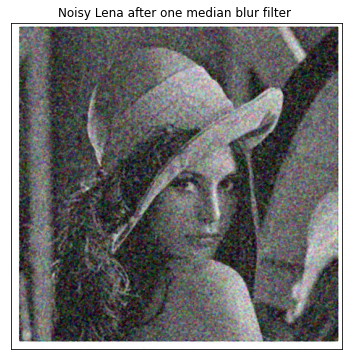

In [ ]:
# Denoise the image using median filtering
denoise_img = cv2.medianBlur(np.float32(img_noisy1),3)
plt.figure(figsize=(6,6))
plt.imshow(denoise_img, cmap=plt.cm.gray)
plt.title('Noisy Lena after one median blur filter ')
plt.xticks(())
plt.yticks(())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


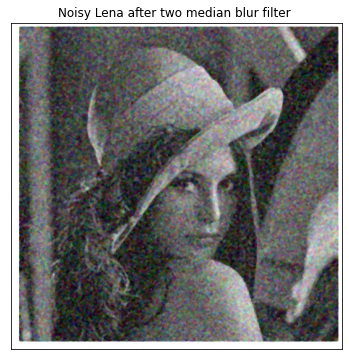

In [ ]:
denoise_img = cv2.medianBlur(np.float32(denoise_img),3)
plt.figure(figsize=(6,6))
plt.imshow(denoise_img, cmap=plt.cm.gray)
plt.title('Noisy Lena after two median blur filter ')
plt.xticks(())
plt.yticks(())
plt.show()

6. Filtrage bruit périodique. Proposez un algorithme / script qui permet de
« nettoyer » les images noise.tif et clown.tif


l'idée est de mettre à zero les points bruit( blanc) dans le spectre


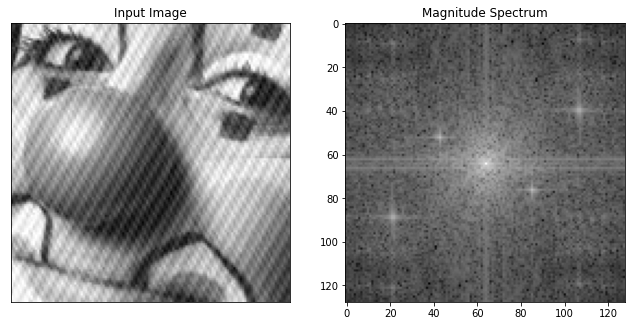

In [ ]:
img = mpimg.imread('clown.tif')
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

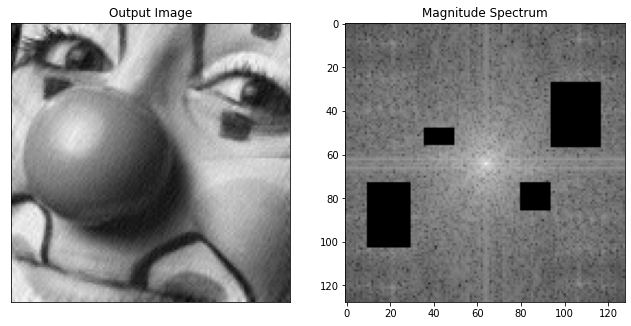

In [ ]:
#denoising
dft_shift[48:56,36:50]=1
dft_shift[73:103,10:30]=1
dft_shift[73:86,80:94]=1
dft_shift[27:57,94:117]=1

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

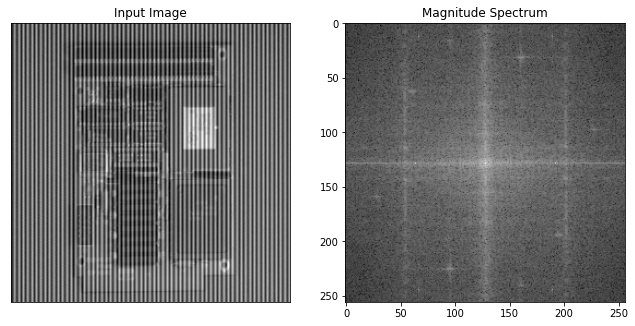

In [ ]:
img = mpimg.imread('noise.tif')
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)
# save image of the image in the fourier domain.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

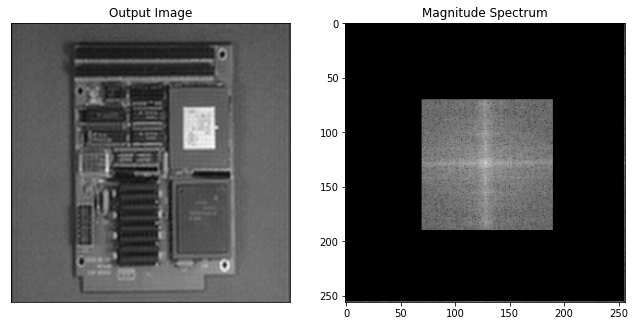

In [ ]:
#denoising
dft_shift[0:255,0:70]=1
dft_shift[0:255,190:255]=1
dft_shift[0:70,0:255]=1
dft_shift[190:255,0:255]=1

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

7- Atenuation / élimination du bruit. Proposez un script qui permet d’éliminer le bruit
de l’images mercury.tif et noisy_Lena.png.

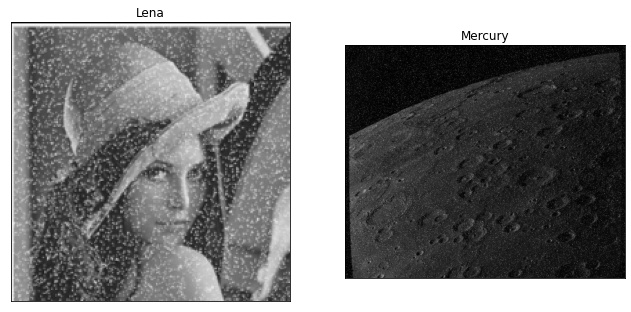

In [ ]:
img = cv2.imread('noisy_Lena.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = mpimg.imread('mercury.tif')

plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Lena'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap = 'gray')
plt.title('Mercury'), plt.xticks([]), plt.yticks([])
plt.show()

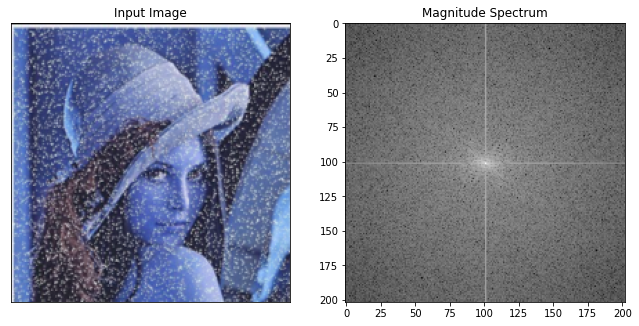

In [ ]:
dft = cv2.dft(np.float32(gray),flags = cv2.DFT_COMPLEX_OUTPUT)
# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)
# save image of the image in the fourier domain.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

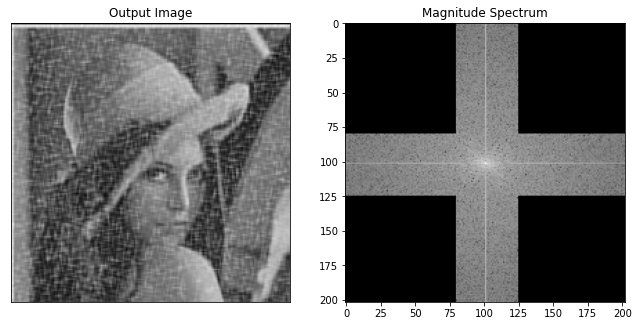

In [ ]:
dft_shift[0:80,0:80]=1
dft_shift[0:80,125:255]=1
dft_shift[0:50,0:80]=1
dft_shift[125:255,0:80]=1
dft_shift[125:255,125:255]=1
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()


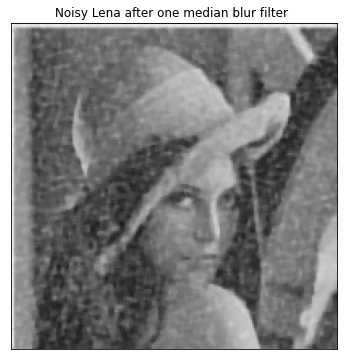

In [ ]:
# Denoise the image using median filtering
denoise_img = cv2.medianBlur(np.float32(img_back),3)
plt.figure(figsize=(6,6))
plt.imshow(denoise_img, cmap=plt.cm.gray)
plt.title('Noisy Lena after one median blur filter ')
plt.xticks(())
plt.yticks(())
plt.show()
Image.fromarray(denoise_img.clip(0,255).astype("uint8")).save("Lena_after_med.png")